In [1]:
import os
os.chdir("C:\\Users\\Naveen Kumar Banty\\Desktop\\data by bikram")
os.getcwd()

'C:\\Users\\Naveen Kumar Banty\\Desktop\\data by bikram'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
data = pd.read_csv('Retail_Data_Transactions.csv' , parse_dates = ['trans_date'])
data.head()

,customer_id,trans_date,tran_amount
0,CS5295,2013-02-11,35
1,CS4768,2015-03-15,39
2,CS2122,2013-02-26,52
3,CS1217,2011-11-16,99
4,CS1850,2013-11-20,78


In [4]:
data.describe()

,tran_amount
count,125000.000000
mean,64.991912
std,22.860006
min,10.000000
25%,47.000000
50%,65.000000
75%,83.000000
max,105.000000


In [5]:
data.isnull().sum()

customer_id    0
trans_date     0
tran_amount    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 3 columns):
customer_id    125000 non-null object
trans_date     125000 non-null datetime64[ns]
tran_amount    125000 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.9+ MB


In [7]:
print(data['trans_date'].min(), data['trans_date'].max())

2011-05-16 00:00:00 2015-03-16 00:00:00


In [18]:
# Creating a new column 'hist' that measures the number of days from 2015,4,1(yyyy/mm/dd).
sd = dt.datetime(2015,4,1)
data['hist']= (sd - data['trans_date']) / np.timedelta64(1, 'D') #finding the delta in days and converting the column into float datatype.
# data['hist']=data['hist']
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63633 entries, 1 to 124999
Data columns (total 4 columns):
customer_id    63633 non-null object
trans_date     63633 non-null datetime64[ns]
tran_amount    63633 non-null int64
hist           63633 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.4+ MB


,customer_id,trans_date,tran_amount,hist
1,CS4768,2015-03-15,39,17.0
4,CS1850,2013-11-20,78,497.0
5,CS5539,2014-03-26,81,371.0
7,CS5902,2015-01-30,89,61.0
9,CS3802,2013-08-20,75,589.0


In [9]:
data=data[data['hist'] < 730]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63633 entries, 1 to 124999
Data columns (total 4 columns):
customer_id    63633 non-null object
trans_date     63633 non-null datetime64[ns]
tran_amount    63633 non-null int64
hist           63633 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.4+ MB


In [10]:
data.head()

,customer_id,trans_date,tran_amount,hist
1,CS4768,2015-03-15,39,17.0
4,CS1850,2013-11-20,78,497.0
5,CS5539,2014-03-26,81,371.0
7,CS5902,2015-01-30,89,61.0
9,CS3802,2013-08-20,75,589.0


In [13]:
# calculating RFM table for the custemer data
rfmTable = data.groupby('customer_id').agg({'hist': lambda x:x.min(), # Recency:most recent transaction will have the smallest hist value hence, x.min()
                                        'customer_id': lambda x:len(x),    # Frequency: to find the frequency of the customer. we just see the number of transactions on the customer id.
                                        'tran_amount': lambda x: x.sum()})  # Monetary Value: To find the sum of amount spent by the custemer, we sum the transaction amount column.
# Renaming the column names appropriatly.
rfmTable.rename(columns={'hist': 'recency', 
                         'customer_id': 'frequency', 
                         'tran_amount': 'monetary_value'}, inplace=True)

In [14]:
rfmTable.head()

,recency,frequency,monetary_value
customer_id,,,
CS1112,77.0,6,358
CS1113,51.0,11,775
CS1114,48.0,11,804
CS1115,27.0,10,765
CS1116,219.0,5,333


In [54]:
rfmTable.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6884 entries, CS1112 to CS9000
Data columns (total 3 columns):
recency           6884 non-null float64
frequency         6884 non-null int64
monetary_value    6884 non-null int64
dtypes: float64(1), int64(2)
memory usage: 215.1+ KB


In [55]:
data[data['customer_id']=='CS1112']

,customer_id,trans_date,tran_amount,hist
5650,CS1112,2015-01-14,39,77.0
17810,CS1112,2014-07-16,90,259.0
26626,CS1112,2014-04-29,63,337.0
31500,CS1112,2014-12-04,59,118.0
42084,CS1112,2013-07-01,36,639.0
74842,CS1112,2013-11-13,71,504.0


In [56]:
quartiles = rfmTable.quantile(q=[0.25,0.50,0.75])
print(quartiles, type(quartiles))

      recency  frequency  monetary_value
0.25     38.0        7.0           379.0
0.50     69.0        9.0           591.0
0.75    127.0       11.0           796.0 <class 'pandas.core.frame.DataFrame'>


In [57]:
quartiles=quartiles.to_dict()
quartiles

{'recency': {0.25: 38.0, 0.5: 69.0, 0.75: 127.0},
 'frequency': {0.25: 7.0, 0.5: 9.0, 0.75: 11.0},
 'monetary_value': {0.25: 379.0, 0.5: 591.0, 0.75: 796.0}}

In [58]:
## for Recency 

def RClass(x):
    if x <= quartiles['recency'][0.25]:
        return 1
    elif x <= quartiles['recency'][0.50]:
        return 2
    elif x <= quartiles['recency'][0.75]: 
        return 3
    else:
        return 4
    
## for Frequency 
def FClass(x):
    if x <= quartiles['frequency'][0.25]:
        return 4
    elif x <= quartiles['frequency'][0.50]:
        return 3
    elif x <= quartiles['frequency'][0.75]: 
        return 2
    else:
        return 1

# for Monetary value    
def MClass(x):
    if x <= quartiles['monetary_value'][0.25]:
        return 4
    elif x <= quartiles['monetary_value'][0.50]:
        return 3
    elif x <= quartiles['monetary_value'][0.75]: 
        return 2
    else:
        return 1

In [59]:
rfmTable.head()

,recency,frequency,monetary_value
customer_id,,,
CS1112,77.0,6,358
CS1113,51.0,11,775
CS1114,48.0,11,804
CS1115,27.0,10,765
CS1116,219.0,5,333


In [60]:
rfmSeg = rfmTable
rfmSeg['R_Quartile'] = rfmSeg['recency'].apply(RClass)
rfmSeg['F_Quartile'] = rfmSeg['frequency'].apply(FClass)
rfmSeg['M_Quartile'] = rfmSeg['monetary_value'].apply(MClass)
rfmSeg.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile
customer_id,,,,,,
CS1112,77.0,6,358,3,4,4
CS1113,51.0,11,775,2,2,2
CS1114,48.0,11,804,2,2,1
CS1115,27.0,10,765,1,2,2
CS1116,219.0,5,333,4,4,4


In [61]:
# Making unique rfm class id.
rfmSeg['RFMClass'] = rfmSeg.R_Quartile.map(str) \
                            + rfmSeg.F_Quartile.map(str) \
                            + rfmSeg.M_Quartile.map(str)

In [62]:
rfmSeg.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
CS1112,77.0,6,358,3,4,4,344
CS1113,51.0,11,775,2,2,2,222
CS1114,48.0,11,804,2,2,1,221
CS1115,27.0,10,765,1,2,2,122
CS1116,219.0,5,333,4,4,4,444


In [63]:
rfmSeg.sort_values(by=['RFMClass', 'monetary_value'], ascending=[True, False])

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
CS4640,34.0,21,1610,1,1,1,111
CS5343,29.0,20,1585,1,1,1,111
CS3622,29.0,20,1549,1,1,1,111
CS2316,19.0,21,1446,1,1,1,111
CS3270,19.0,20,1436,1,1,1,111
CS3885,30.0,19,1430,1,1,1,111
CS1785,34.0,21,1408,1,1,1,111
CS4871,26.0,18,1396,1,1,1,111
CS1545,37.0,20,1394,1,1,1,111


In [64]:
rfmSeg.groupby('RFMClass').agg('monetary_value').mean()

RFMClass
111    1001.289963
112     740.833333
113     521.812500
121     843.608696
122     713.430712
123     490.388889
124     365.000000
132     651.675000
133     508.502890
134     317.112903
142     601.250000
143     466.422078
144     267.688312
211     993.914489
212     739.839286
213     523.285714
221     853.373134
222     706.114173
223     477.266667
224     346.000000
232     661.487013
233     509.475904
234     332.772727
242     616.600000
243     464.374150
244     258.209559
311     982.434174
312     738.615385
313     528.923077
321     834.352113
322     711.404255
323     489.859375
324     335.000000
332     655.697368
333     512.409524
334     326.098039
342     605.000000
343     465.619318
344     247.666667
411     960.285714
412     746.937500
413     501.500000
421     831.971429
422     712.770115
423     479.200000
424     350.000000
431     816.500000
432     652.716312
433     513.865169
434     324.096154
442     609.500000
443     461.333333
444

In [65]:
rfmSeg['Total Score'] = rfmSeg['R_Quartile'] + rfmSeg['F_Quartile'] +rfmSeg['M_Quartile']
print(rfmSeg.head(), rfmSeg.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6884 entries, CS1112 to CS9000
Data columns (total 8 columns):
recency           6884 non-null float64
frequency         6884 non-null int64
monetary_value    6884 non-null int64
R_Quartile        6884 non-null int64
F_Quartile        6884 non-null int64
M_Quartile        6884 non-null int64
RFMClass          6884 non-null object
Total Score       6884 non-null int64
dtypes: float64(1), int64(6), object(1)
memory usage: 484.0+ KB
             recency  frequency  monetary_value  R_Quartile  F_Quartile  \
customer_id                                                               
CS1112          77.0          6             358           3           4   
CS1113          51.0         11             775           2           2   
CS1114          48.0         11             804           2           2   
CS1115          27.0         10             765           1           2   
CS1116         219.0          5             333           4           4

In [66]:
rfmSeg.groupby('Total Score').agg('monetary_value').mean()

Total Score
3     1001.289963
4      952.057621
5      849.503277
6      741.711462
7      629.974101
8      557.809645
9      447.638221
10     385.731672
11     335.414443
12     230.907975
Name: monetary_value, dtype: float64

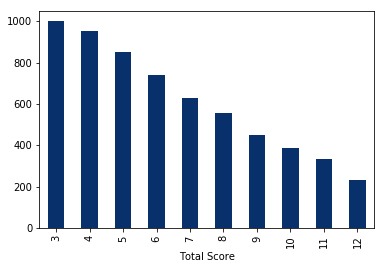

In [67]:
rfmSeg.groupby('Total Score').agg('monetary_value').mean().plot(kind='bar', colormap='Blues_r')

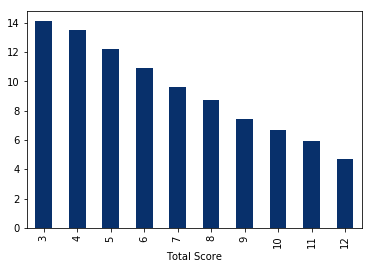

In [68]:
rfmSeg.groupby('Total Score').agg('frequency').mean().plot(kind='bar', colormap='Blues_r')

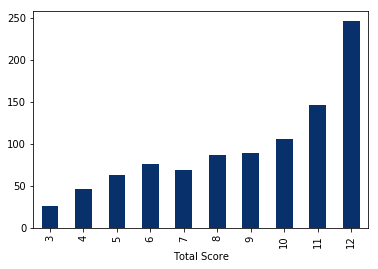

In [69]:
rfmSeg.groupby('Total Score').agg('recency').mean().plot(kind='bar', colormap='Blues_r')

In [74]:
res = pd.read_csv('Retail_Data_Response.csv')
res.sort_values('customer_id', inplace=True)

print(res.head(), res.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6884 entries, 0 to 6883
Data columns (total 2 columns):
customer_id    6884 non-null object
response       6884 non-null int64
dtypes: int64(1), object(1)
memory usage: 161.3+ KB
  customer_id  response
0      CS1112         0
1      CS1113         0
2      CS1114         1
3      CS1115         1
4      CS1116         1 None


In [75]:
rfmSeg.reset_index(inplace=True)
rfmSeg.head()

,level_0,index,customer_id,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score
0,0,0,CS1112,77.0,6,358,3,4,4,344,11
1,1,1,CS1113,51.0,11,775,2,2,2,222,6
2,2,2,CS1114,48.0,11,804,2,2,1,221,5
3,3,3,CS1115,27.0,10,765,1,2,2,122,5
4,4,4,CS1116,219.0,5,333,4,4,4,444,12


In [76]:
res.head()

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1


In [77]:
rfmSeg.sort_values('customer_id', inplace=True)
rfm2=pd.merge(rfmSeg, res, on='customer_id')

In [78]:
rfm2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6884 entries, 0 to 6883
Data columns (total 12 columns):
level_0           6884 non-null int64
index             6884 non-null int64
customer_id       6884 non-null object
recency           6884 non-null float64
frequency         6884 non-null int64
monetary_value    6884 non-null int64
R_Quartile        6884 non-null int64
F_Quartile        6884 non-null int64
M_Quartile        6884 non-null int64
RFMClass          6884 non-null object
Total Score       6884 non-null int64
response          6884 non-null int64
dtypes: float64(1), int64(9), object(2)
memory usage: 699.2+ KB


Text(0, 0.5, 'Proportion of Responders')

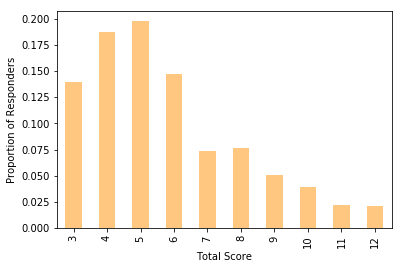

In [79]:
ax=rfm2.groupby('Total Score').agg('response').mean().plot(kind='bar', colormap='copper_r')
ax.set_xlabel("Total Score")
ax.set_ylabel("Proportion of Responders")

In [ ]:
# so its best to target the promotions towards customers who have a total score of 4-6.